In [734]:
import scanpy as sc
import pandas as pd
import numpy as np

In [934]:
adata1 = sc.read_h5ad('../data/covid19/subdata/RNA_1.h5ad')
adata2 = sc.read_h5ad('../data/covid19/subdata/RNA_4.h5ad')
subdata1 = adata1[adata1.obs['minor_subset'].isin(['CD8.TEMRA','CD8.NAIVE','CD4.NAIVE'])]
subdata2 = adata2[adata2.obs['minor_subset'].isin(['CD8.TEMRA','CD4.NAIVE'])]

In [736]:
def scanpypp(adata):
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata,min_disp=0.8)
    adata = adata[:,adata.var.highly_variable]
    sc.pp.scale(adata)
    sc.pp.pca(adata, n_comps=50)
    return adata

In [935]:
adata = sc.concat([subdata1,subdata2],axis=0)

In [936]:
adata_pp = scanpypp(adata.copy())

/home/xinzhu/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
from scalable_gcca import learn
ppdata = {}
for i in rnadata.keys():
# print('before pp',i,rnadata[i].shape
    # print(len(rnadata[i]))
    # if len(rnadata[i]) not in ([968,1069,446,653]):
    #     continue
    if len(rnadata[i]) < 100:
        continue
    
    if rnadata[i].shape[0] > 500:
        
        rand = np.random.choice(rnadata[i].shape[0]-1, 500,replace=False)
        rnadata[i] = rnadata[i][rand,:]

    adata = rnadata[i].copy()
    # print(sum(adata.X.toarray()[:100,:100]))
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata,min_disp=0.5)

    # adata = adata[:,adata.var.highly_variable]
    # sc.pp.scale(adata)
    # sc.pp.pca(adata, n_comps=100)
    # ppdata[i] = sparse.csr_matrix(adata.obsm['X_pca'].T)

    ppdata[i] = adata[:,adata.var['highly_variable']]
    gene_list  = gene_list & set(list(ppdata[i].var_names))

    data_cc = {}
    if len(ppdata.keys()) < 2:
        for i in ppdata.keys():
            # temp = normalize(ppdata[i][:5,:].T,copy=True)
            data_cc[i] = pd.DataFrame(data=temp,index=rnadata[i].obs_names,columns=['CC_'+str(k+1) for k in range(5)])

    # for i in ppdata.keys():
    #     if isspmatrix_csr(ppdata[i].X):
    #         ppdata[i] = ppdata[i][:,list(gene_list)].X.toarray().T
    #     else:
    #         ppdata[i] = ppdata[i][:,list(gene_list)].X.T
        
    # logging.root.setLevel(level=logging.INFO)
    # gcca = GCCA(n_components=5)
    # gcca.fit(ppdata)
    # cca_loading = gcca.h_list
    # print(gcca.eigvals[:5])

    # print(ppdata.values())
    model = learn(list(ppdata.values()), k=5, epochs=10, verbose=False)
    cca_loading = model.Qs

In [946]:
from sklearn.cross_decomposition import CCA,PLSCanonical,PLSRegression
from sklearn.preprocessing import normalize

# reference = np.dot(adata[:,list(gene_list)].X.T,adata.obsm['X_pca'][:,0])
# sc.tl.pca(adata_pp, n_comps=50)
# pc1 = pd.DataFrame(normalize(adata_pp[subdata1.obs_names].obsm['X_pca']).T,columns=subdata1.obs_names)
# pc2 = pd.DataFrame(normalize(adata_pp[subdata2.obs_names].obsm['X_pca']).T,columns=subdata2.obs_names)

pc1 = pd.DataFrame(normalize(adata_pp[subdata1.obs_names].X.toarray()).T,columns=subdata1.obs_names)
pc2 = pd.DataFrame(normalize(adata_pp[subdata2.obs_names].X.toarray()).T,columns=subdata2.obs_names)

# rand = np.random.choice(pc1.shape[1]-1, 1000, replace=False)
# pc1 = pc1.iloc[:,rand]
# rand = np.random.choice(pc2.shape[1]-1, 1000, replace=False)
# pc2 = pc2.iloc[:,rand]

# cca = CCA(n_components=5)
# cca.fit(pc1,pc2)
# plsc = PLSCanonical(n_components=5)
# plsc.fit(pc1,pc2)
plsr = PLSRegression(n_components=5)
plsr.fit(pc1,pc2)



PLSRegression(n_components=5)

In [127]:
from Classifier.gcca import GCCA
# model = learn(list(ppdata.values()), k=5, epochs=10, verbose=False)
# cca_loading = model.Qs
gcca = GCCA(n_components=5)
# rand = np.random.choice(pc1.shape[1]-1, 1000, replace=False)
# pc1 = pc1.iloc[:,rand]
# rand = np.random.choice(pc2.shape[1]-1, 1000, replace=False)
# pc2 = pc2.iloc[:,rand]
gcca.fit([pc1,pc2])
# cca_vector = gcca.transform([ppdata[i] for i in usedata[k]])
# print(len([ppdata[i] for i in usedata[k]]))
# print(dict(zip(usedata[k],[ppdata[i] for i in usedata[k]])))
# cca_vector = gcca.fit_transform(dict(zip(usedata[k],[ppdata[i] for i in usedata[k]])))
# cca_loading = gcca.h_list

In [128]:
adata_pp.varm['PCs'].shape

(938, 50)

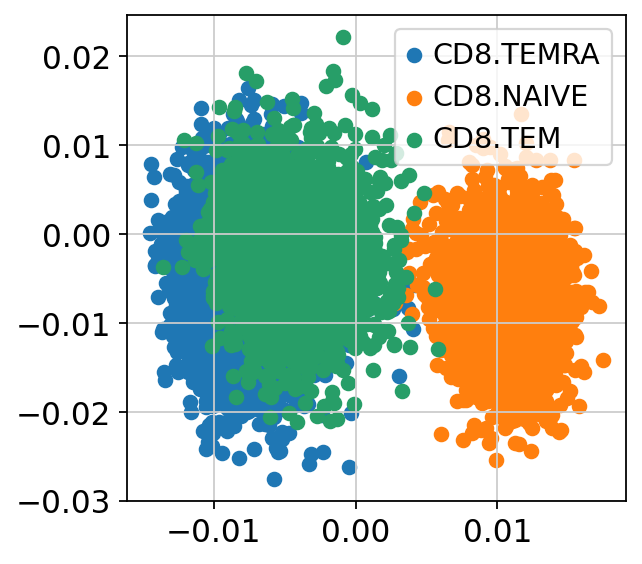

In [750]:
import matplotlib.pyplot as plt

# cca_loading = cca.x_loadings_

# cca_loading = pd.DataFrame(index=pc1.columns,data=gcca.h_list[0])
cca_loading = pd.DataFrame(index=pc1.columns,data=plsc.x_weights_)
# plt.hist(cca_loading.iloc[:,0],bins=100)
# plt.scatter(cca_loading.iloc[:,0],cca_loading.iloc[:,1])
subdata = subdata1[pc1.columns,:]
plt.scatter(cca_loading[subdata.obs['minor_subset']=='CD8.TEMRA'].iloc[:,0],cca_loading[subdata.obs['minor_subset']=='CD8.TEMRA'].iloc[:,1])
plt.scatter(cca_loading[subdata.obs['minor_subset']=='CD8.NAIVE'].iloc[:,0],cca_loading[subdata.obs['minor_subset']=='CD8.NAIVE'].iloc[:,1])
plt.scatter(cca_loading[subdata.obs['minor_subset']=='CD8.TEM'].iloc[:,0],cca_loading[subdata.obs['minor_subset']=='CD8.TEM'].iloc[:,1])
plt.legend(['CD8.TEMRA','CD8.NAIVE','CD8.TEM'])
plt.show()

In [742]:
sc.settings.set_figure_params(dpi=80, facecolor='white')

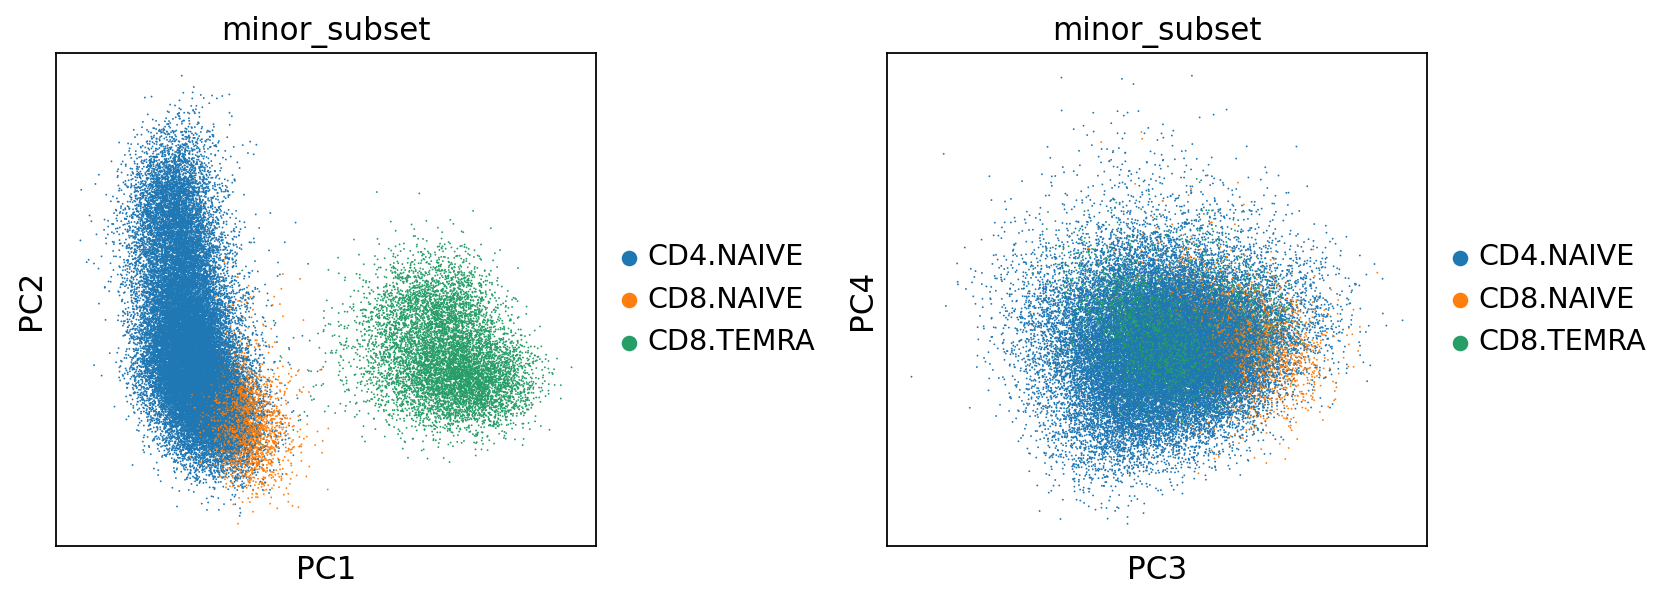

In [966]:
# subdata = subdata1[pc1.columns,:]
subdata = sc.concat([subdata1[pc1.columns,:],subdata2[pc2.columns,:]])
subdata.obsm['X_pca'] = np.concatenate([plsr.x_weights_,plsr.y_weights_])
# subdata.obsm['X_pca'] = np.concatenate([plsr.x_loadings_,plsr.y_loadings_])

sc.pl.pca(subdata,components=['1,2','3,4'],color=['minor_subset'],wspace=0.4)
# sc.pp.neighbors(subdata)
# sc.tl.umap(subdata)
# # sc.pl.umap(subdata,color='minor_subset')

# sc.tl.leiden(subdata,resolution=0.15)
# sc.pl.umap(subdata,color=['Source','minor_subset'],wspace=0.4)

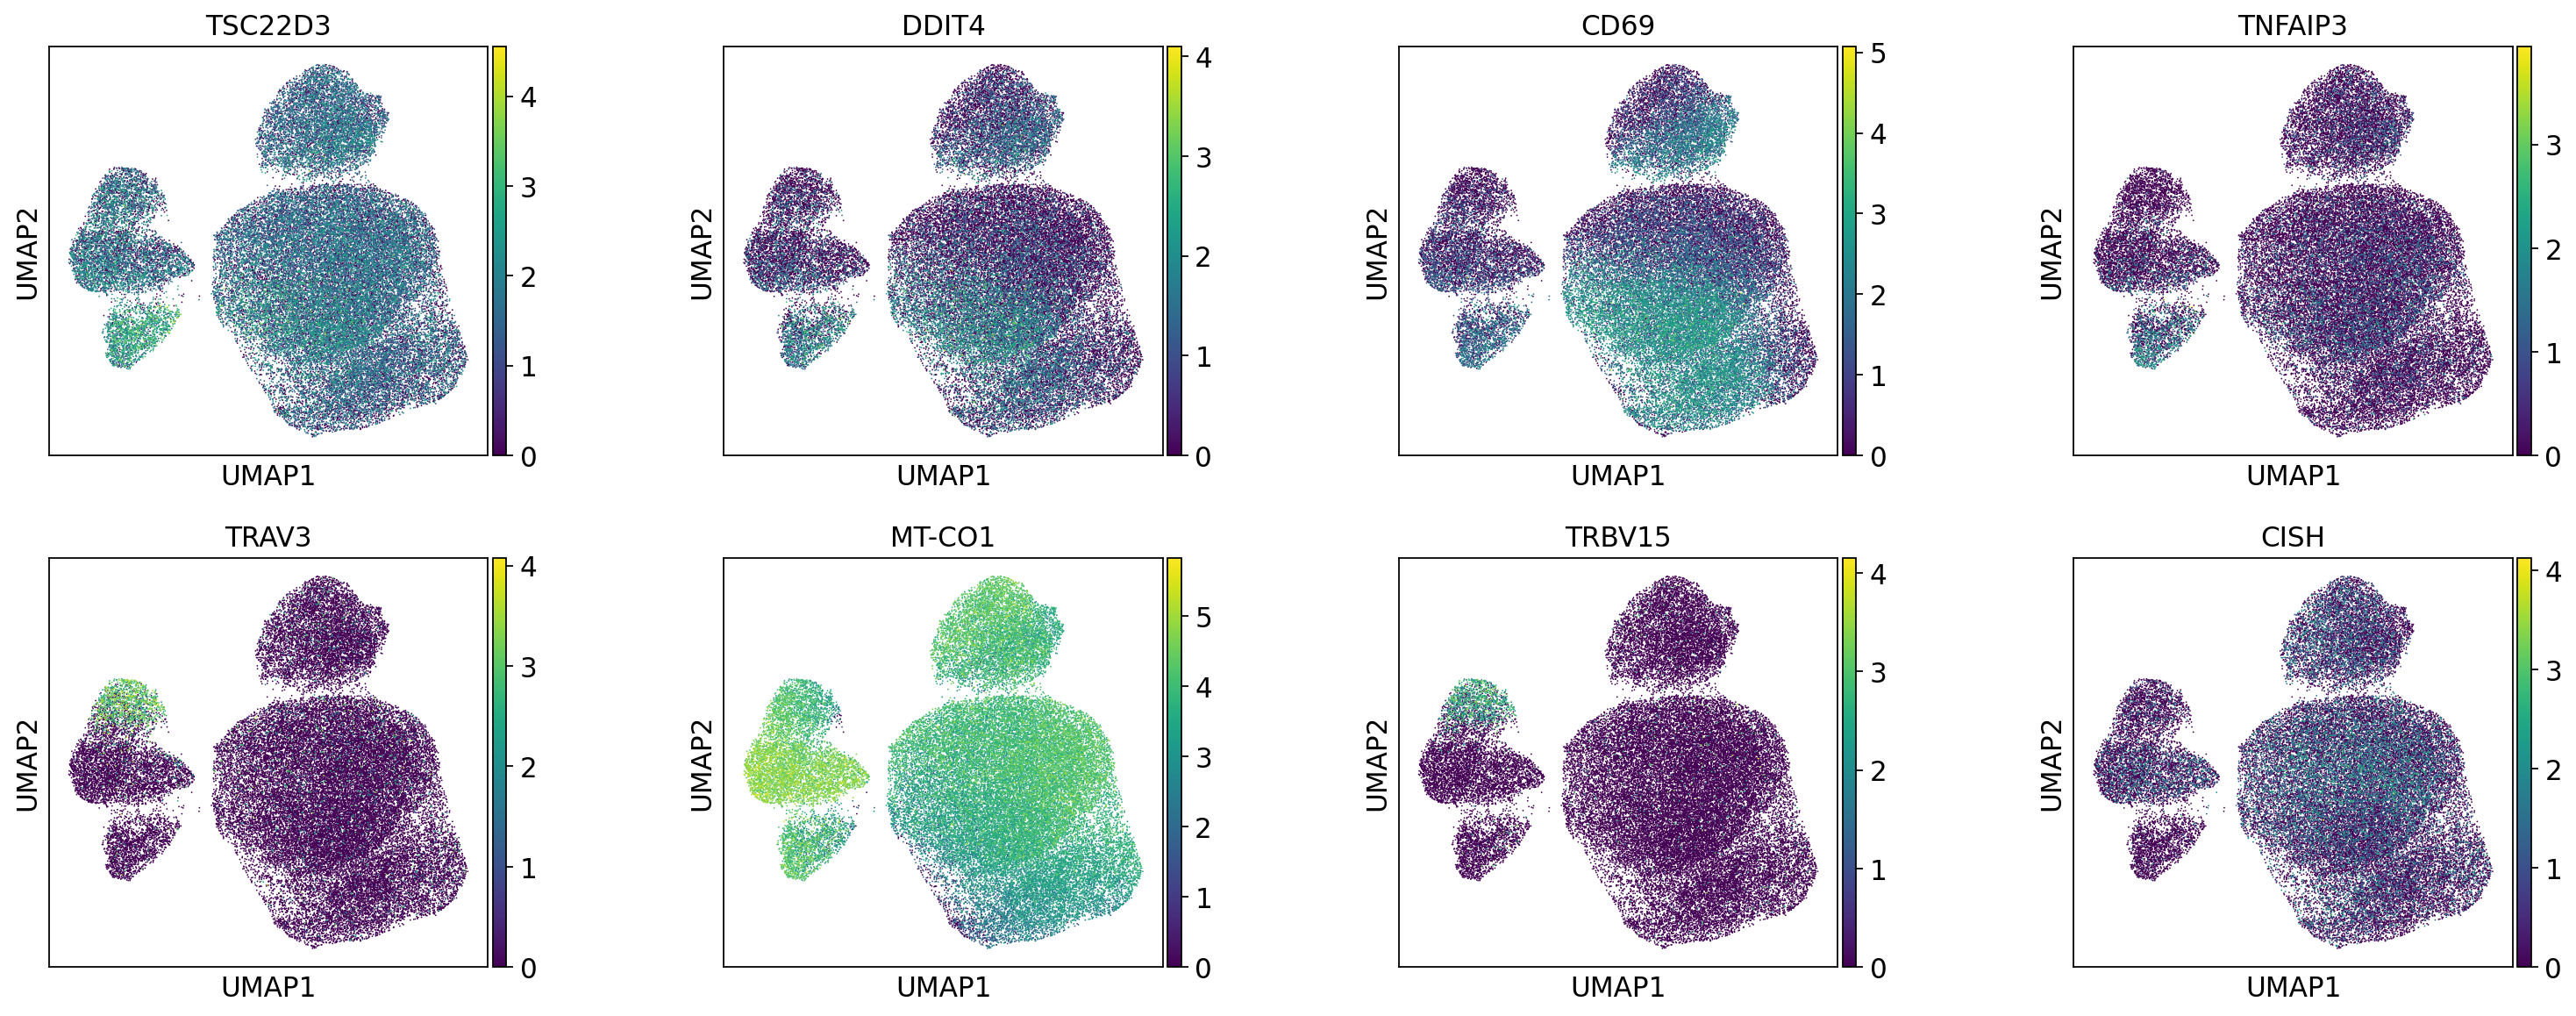

In [932]:
sc.pl.umap(subdata,color=markers,wspace=0.4)

In [939]:
sc.tl.rank_genes_groups(adata_pp, groupby='minor_subset',groups=['CD8.TEMRA','CD8.NAIVE','CD4.NAIVE'])
# adata_sub = adata_pp[adata_pp.obs['minor_subset']=='CD8.TEMRA']
# sc.tl.rank_genes_groups(adata_sub, groupby='Source')

/home/xinzhu/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [869]:
adata_sub.obs['Source'].cat.categories

Index(['COVID_CRIT', 'HV'], dtype='object')

In [958]:
marker_genes = pd.DataFrame(adata_pp.uns['rank_genes_groups']['names']).iloc[:500,:].T
num = 30
markers = sum(np.array(marker_genes.iloc[:,:num]).tolist(),[])
markers1 =np.array(marker_genes.iloc[0,:num]).tolist()
markers2 = np.array(marker_genes.iloc[1,:num]).tolist()
markers3 = np.array(marker_genes.iloc[2,:num]).tolist()

In [794]:
adata_pp.var_names

Index(['AL031282.2', 'TNFRSF1B', 'VPS13D', 'EFHD2', 'SPEN', 'C1QB', 'LDLRAP1',
       'STMN1', 'ZNF683', 'FGR',
       ...
       'MX1', 'COL6A2', 'S100B', 'MT-ND1', 'MT-ND2', 'MT-ATP8', 'MT-ND4',
       'MT-ND6', 'MT-CYB', 'AC011043.1'],
      dtype='object', length=786)

Text(0.5, 1.0, 'Gene values in the THIRD vector')

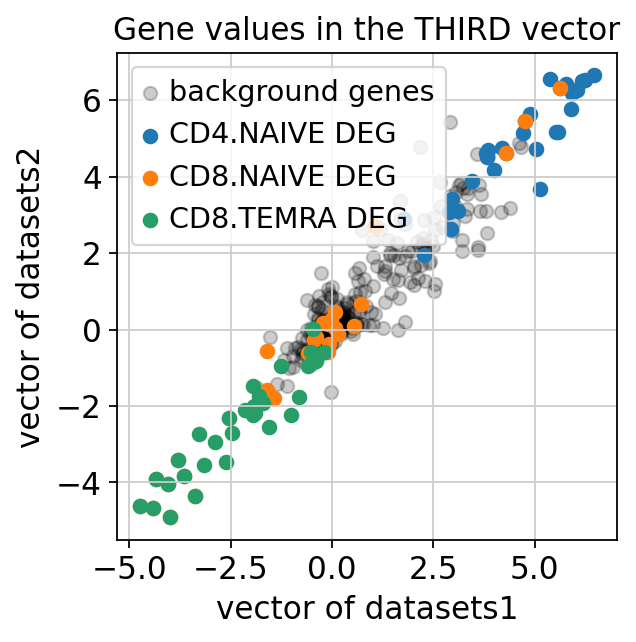

In [967]:
g1 = np.dot(pc1,plsr.x_rotations_) 
g2 = np.dot(pc2,plsr.y_rotations_) 
# markers = adata_pp.var_names.intersection(markers)
g1 = pd.DataFrame(index=adata_pp.var_names,data=g1)
g2 = pd.DataFrame(index=adata_pp.var_names,data=g2)
i = 0
plt.scatter(g1.loc[~g1.index.isin(markers),i],g2.loc[~g2.index.isin(markers),i],alpha=0.2,c='#000000')
plt.scatter(g1.loc[markers1,i],g2.loc[markers1,i],alpha=1)
plt.scatter(g1.loc[markers2,i],g2.loc[markers2,i],alpha=1)
plt.scatter(g1.loc[markers3,i],g2.loc[markers3,i],alpha=1)

# plt.scatter(g2[:,0],g2[:,1],alpha=0.5)
plt.legend(['background genes','CD4.NAIVE DEG','CD8.NAIVE DEG','CD8.TEMRA DEG',])
# plt.legend(['background genes','dataset2 DEG in CD8 TEMRA','dataset1 DEG in CD8 TEMRA',], loc='upper center')
plt.xlabel('vector of datasets1')
plt.ylabel('vector of datasets2')
plt.title('Gene values in the THIRD vector')

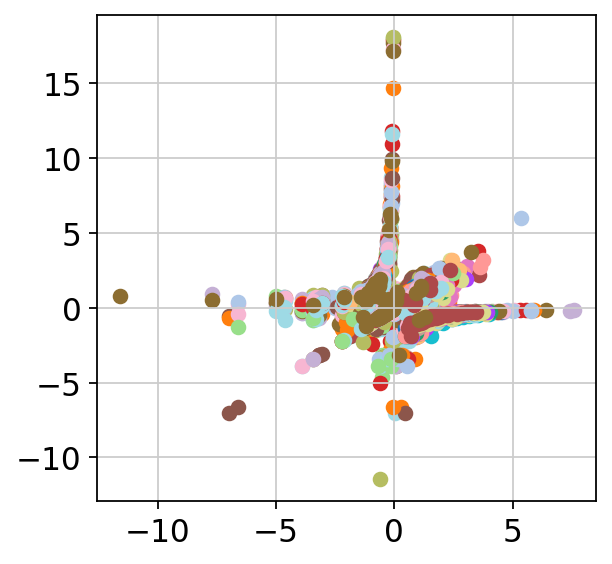

In [838]:
# plt.axes
for i in range(100):

    plt.scatter(adata_pp[subdata1.obs_names,markers1].X[i],adata_pp[subdata2.obs_names,markers1].X[i])
    plt.scatter(adata_pp[subdata1.obs_names,markers2].X[i],adata_pp[subdata2.obs_names,markers2].X[i])


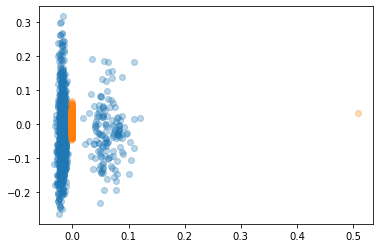

In [132]:
# cca.x_rotations_.shape
# cca._x_scores.shape
score = cca._x_scores
loading = cca.x_loadings_
# z = np.dot(pc1,score.T)
x_ = np.dot(score,loading.T)
score = plsc._x_scores
loading = plsc.x_loadings_
# score = gcca.transform([pc1,pc2])[0]
# loading = gcca.h_list[0]
x__ = np.dot(score,loading.T)

# x__ = np.outer(loading[:,0],score[:,0].T).T
plt.scatter(pc1.iloc[0,:],x_[0,:],alpha=0.3)
plt.scatter(pc1.iloc[1,:],x__[1,:],alpha=0.3)

# for i in range(len(pc1)):
#     # plt.scatter(pc1.iloc[i,:],x_[i,:],alpha=0.3)
#     plt.scatter(pc1.iloc[i,:],x__[i,:],alpha=0.3)

In [133]:
x___=np.dot(adata_pp.varm['PCs'],adata_pp[pc1.columns].obsm['X_pca'].T)
# corr = np.corrcoef(x___.T,adata_pp[pc1.columns,:].X.toarray())
corr = np.corrcoef(x__.T,pc1.values.T)
# cov = np.cov(x__.T,pc1.values.T)
# abs(corr[:938,938:]).trace()/938
# abs(corr[:100,100:]).trace()/100
abs(corr[:1000,1000:]).trace()/1000
# np.mean(corr[1000:,:1000]**2)

0.17733137482463132

In [79]:
corr[:1000,1000:][2,2]

0.4260631834548749

In [729]:
### influence of variation and covariation (Sxx)

import numpy as np
from sklearn.preprocessing import normalize

n = 4000
noise = int(n/2)
# 2 latents vars:
l1 = np.random.normal(size=(n,1))
l2 = np.random.normal(size=(n,1))+2
l3 = np.random.normal(size=(n,1))+4
l4 = np.random.normal(size=(n,1))+6
l0 = np.random.normal(size=(noise,1))

nvar = 400
latents1 = l1*2+np.ones(shape=(n,nvar))*0.1
latents2 = l2*2+np.ones(shape=(n,nvar))*0.1
latents3 = l3*2+np.ones(shape=(n,nvar))*0.1
latents4 = l4*2+np.ones(shape=(n,nvar))*0.1
latents0 = l0*2+np.ones(shape=(noise,nvar*2))*0.1


latents = np.concatenate([latents1, latents2],axis=1)
# latents = np.concatenate([latents, latents3],axis=1)
latents = np.concatenate([latents,latents0],axis=0)
X = latents + np.random.normal(size=latents.shape[1] * latents.shape[0]).reshape((latents.shape[0], latents.shape[1]))
latents = np.concatenate([latents1, latents4],axis=1)
# latents = np.concatenate([latents, latents3],axis=1)
latents = np.concatenate([latents,latents0],axis=0)
Y = latents + np.random.normal(size=latents.shape[1] * latents.shape[0]).reshape((latents.shape[0], latents.shape[1]))

# X = normalize(X,axis=1,norm='l1')
# Y = normalize(Y,axis=1,norm='l1')
# X = normalize(X,axis=0,norm='l1')
# Y = normalize(Y,axis=0,norm='l1')

X_train = X[: n // 2]
Y_train = Y[: n // 2]
# X_test = X[n // 2 :]
# Y_test = Y[n // 2 :]

print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

Corr(X)
[[1.   0.8  0.8  ... 0.2  0.21 0.22]
 [0.8  1.   0.8  ... 0.21 0.21 0.21]
 [0.8  0.8  1.   ... 0.21 0.21 0.22]
 ...
 [0.2  0.21 0.21 ... 1.   0.89 0.88]
 [0.21 0.21 0.21 ... 0.89 1.   0.88]
 [0.22 0.21 0.22 ... 0.88 0.88 1.  ]]
Corr(Y)
[[1.   0.79 0.79 ... 0.1  0.1  0.1 ]
 [0.79 1.   0.8  ... 0.1  0.1  0.1 ]
 [0.79 0.8  1.   ... 0.11 0.1  0.11]
 ...
 [0.1  0.1  0.11 ... 1.   0.97 0.97]
 [0.1  0.1  0.1  ... 0.97 1.   0.97]
 [0.1  0.1  0.11 ... 0.97 0.97 1.  ]]


In [414]:
# np.sum(X**2,axis=0)
sum(np.cov(X[:,:nvar].T)**2).sum()

678514.2467227888

In [730]:
from sklearn.cross_decomposition import PLSCanonical, CCA, PLSRegression

plsca = PLSCanonical(n_components=4)
plsca.fit(X,Y)

cca = CCA(n_components=4,max_iter=1000)
cca.fit(X, Y)

plscr = PLSRegression(n_components=4)
plscr.fit(X,Y)

PLSRegression(n_components=4)

Text(0, 0.5, 'weight2')

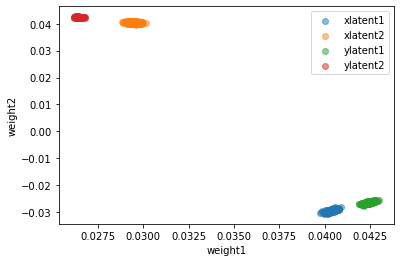

In [731]:
import matplotlib.pyplot as plt

X_loading = plsca.x_weights_
Y_loading = plsca.y_weights_
plt.scatter(X_loading[:nvar,0],X_loading[:nvar,1],alpha=0.5)
# plt.scatter(X_loading[nvar:2*nvar,0],X_loading[nvar:2*nvar,-1])
plt.scatter(X_loading[nvar:,0],X_loading[nvar:,1],alpha=0.5)
# plt.legend(['xlatent1','xlatent2'])#,'latent3'
# plt.show()
plt.scatter(Y_loading[:nvar,0],Y_loading[:nvar,1],alpha=0.5)
# plt.scatter(Y_loading[nvar:2*nvar,0],Y_loading[nvar:2*nvar,-1])
plt.scatter(Y_loading[nvar:,0],Y_loading[nvar:,1],alpha=0.5)
plt.legend(['xlatent1','xlatent2','ylatent1','ylatent2'])
plt.xlabel('weight1')
plt.ylabel('weight2')

Text(0.5, 1.0, 'Transformed')

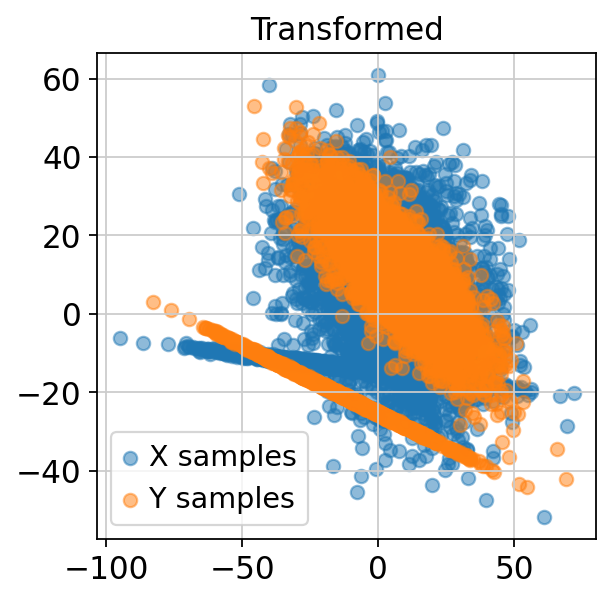

In [769]:
X_r, Y_r = plsca.transform(X, Y)


# plt.scatter(X_r[:,0],Y_r[:,0])

plt.scatter(X_r[:,0],X_r[:,1],alpha=0.5)
plt.scatter(Y_r[:,0],Y_r[:,1],alpha=0.5)
# plt.scatter(Y_r[:n,0],Y_r[:n,1],alpha=0.5)
# plt.scatter(Y_r[n:,0],Y_r[n:,1],alpha=0.5)

# plt.scatter(X.T[:,0],X.T[:,1],alpha=0.5)
# plt.scatter(Y.T[:,0],Y.T[:,1],alpha=0.5)
# plt.scatter(X_loading[nvar:2*nvar,0],X_loading[nvar:2*nvar,-1])
# plt.scatter(X_loading[nvar:,0],X_loading[nvar:,-1])
# plt.legend(['latent1','latent2','latent3'])
# plt.legend(['DE genes','noise genes'])
plt.legend(['X samples','Y samples'])
plt.title('Transformed')


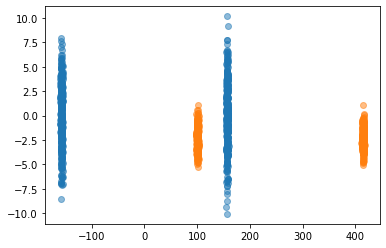

In [656]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X.T)
X_d = pca.transform(X.T)
Y_d = pca.transform(Y.T)
# X_d = pca.fit_transform(X.T)
# pca = PCA(n_components=2)
# Y_d = pca.fit_transform(Y.T)
plt.scatter(X_d[:,0], X_d[:,1], alpha=0.5)
plt.scatter(Y_d[:,0], Y_d[:,1], alpha=0.5)

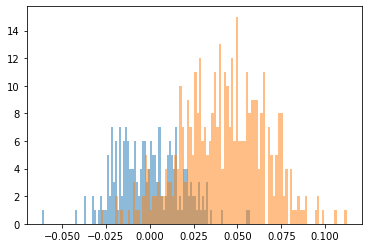

In [481]:
plt.hist(X_loading[:nvar,1],bins=100,alpha=0.5)
plt.hist(X_loading[nvar:,1],bins=100,alpha=0.5)
plt.show()

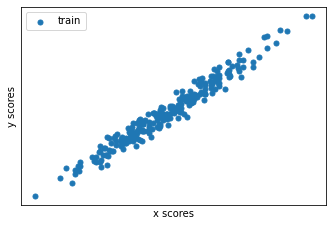

In [24]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
# plt.scatter(X[:, 0], X[:, -1], label="train", marker="o", s=25)
plt.scatter(X_train_r[:, 1], Y_train_r[:, 1], label="train", marker="o", s=25)

plt.xlabel("x scores")
plt.ylabel("y scores")

plt.xticks(())
plt.yticks(())
plt.legend(loc="best")